# MLToolKit Example
Create Date: July 1, 2018; Last Update: July 28, 2019. 
Apache License, Version 2.0 (http://www.apache.org/licenses/LICENSE-2.0)
<hr>

### Current release: PyMLToolKit [v0.1.5]

MLToolkit (mltk) is a Python package providing a set of user-friendly functions to help building machine learning models in data science research, teaching or production focused projects. MLToolkit supports all stages of the machine learning application development process.

### Installation
```
pip install pymltoolkit
```
If the installation failed with dependancy issues, execute the above command with --no-dependencies

```
pip install pymltoolkit --no-dependencies
```

# Content <a class="anchor" id="toc"></a>
* [Introduction](#intro)
* [Load Dataset](#load)
* [Explore Dataset](#eplore)
* [Create Modeling Dataset](#features)
* [Second Bullet Header](#inout)
* [Run Classifier Algorithms](#model)
* [Model Evaluation](#evaluate)
* [Test and Deploy](#deploy)


# Adult Census Income <a class="anchor" id="intro"></a> 
## Predict whether income exceeds $50K/yr based on census data.
Source: https://www.kaggle.com/uciml/adult-census-income/home
<br>
[^](#toc) 

Input Data Attributes:

<ul>
<li>[age]: continuous</li>
<li>[workclass]: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked</li>
<li>[fnlwgt]: continuous. final weight. In other words, this is the number of people the census believes the entry represents.</li>
<li>[education]: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool</li>
<li>[education-num]: The highest level of education achieved in numerical form. continuous</li>
<li>[marital-status]: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse</li>
<li>[occupation]: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces</li>
<li>[relationship]: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried</li>
<li>[race]: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black</li>
<li>[sex]: Female, Male</li>
<li>[capital-gain]: continuous</li>
<li>[capital-loss]: continuous</li>
<li>[hours-per-week]: continuous</li>
<li>[native-country]: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands</li>
<li>[income]: RESPONSE (">50K", "<=50K") </li>
</ul>



# 1. Load Python libraries 

In [1]:
import numpy as np
import pandas as pd
import mltk as mltk
import os
%matplotlib inline

mltk==0.1.5


# 2. Load Dataset <a class="anchor" id="load"></a>
[^](#toc) 

In [2]:
MODEL_SAVE_FOLDER = r'C:\Projects\API\MODELS'

In [3]:
# Load dataset
Data = mltk.read_data_csv(file=r'C:\Projects\Data\incomedata.csv')
# Clean column names (remove special characters)
Data = mltk.clean_column_names(Data, replace='')
# Add ID column
Data = mltk.add_identity_column(Data, id_label='ID', start=1, increment=1)
Data.head(3)

,ID,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,1,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,2,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,3,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K


# 3. Explore Dataset <a class="anchor" id="explore"></a>
[^](#toc)

## 3.1 Fields, Data Types, Bastic Statistics

In [4]:
# Analyze Response Target
target_source='income'
mltk.variable_frequency(DataFrame=Data, variable=target_source).style.background_gradient(cmap='Greens').set_precision(3)

,Counts,CountsFraction%
income,,
<=50K,24720,75.9
>50K,7841,24.1
TOTAL,32561,100


In [5]:
# Set Target Valriable
targetVariable = 'HighIncome'
targetCondition = "income=='>50K'" #For Binary Classification

Data=mltk.set_binary_target(Data, target_condition=targetCondition, target_variable=targetVariable)
mltk.variable_frequency(DataFrame=Data, variable=targetVariable).style.background_gradient(cmap='Greens').set_precision(3)

,Counts,CountsFraction%
HighIncome,,
0,24720,75.9
1,7841,24.1
TOTAL,32561,100


In [6]:
Data[[targetVariable,target_source]].sample(5).style.background_gradient(cmap='Greens').set_precision(3)

,HighIncome,income
17232,0,<=50K
14143,0,<=50K
7177,1,>50K
1925,1,>50K
28275,0,<=50K


In [7]:
# Flag Records to Exclude
excludeCondition="age < 18"
action = 'flag' # 'drop' #
excludeLabel = 'EXCLUDE'
Data=mltk.exclude_records(Data, exclude_condition=excludeCondition, action=action, exclude_label=excludeLabel) # )#
# Get Dataset stats
Data.sample(3).transpose()

Records age < 18 -> EXCLUDE=1
0 records were excluded


,18563,32202,24651
ID,18564,32203,24652
age,22,65,43
workclass,Private,Private,Self-emp-inc
fnlwgt,199419,174603,83348
education,HS-grad,5th-6th,HS-grad
educationnum,9,3,9
maritalstatus,Married-civ-spouse,Widowed,Married-civ-spouse
occupation,Sales,Machine-op-inspct,Craft-repair
relationship,Wife,Not-in-family,Husband
race,White,White,White


In [8]:
DataStats = mltk.data_description(Data)
DataStats

,count,unique,top,freq,mean,std,min,10%,25%,50%,75%,90%,max,dtypes
ID,32561,None,None,None,16281,9399.7,1,3257,8141,16281,24421,29305,32561,int64
age,32561,None,None,None,38.582,13.64,17,22,28,37,48,58,90,int64
workclass,32561,9,Private,22696,None,None,None,None,None,None,None,None,None,object
fnlwgt,32561,None,None,None,1.8978e+05,1.0555e+05,12285,65716,1.1783e+05,1.7836e+05,2.3705e+05,3.2905e+05,1.4847e+06,int64
education,32561,16,HS-grad,10501,None,None,None,None,None,None,None,None,None,object
educationnum,32561,None,None,None,10.081,2.5727,1,7,9,10,12,13,16,int64
maritalstatus,32561,7,Married-civ-spouse,14976,None,None,None,None,None,None,None,None,None,object
occupation,32561,15,Prof-specialty,4140,None,None,None,None,None,None,None,None,None,object
relationship,32561,6,Husband,13193,None,None,None,None,None,None,None,None,None,object
race,32561,5,White,27816,None,None,None,None,None,None,None,None,None,object


## 3.2 Inspect Categorical Variables

In [9]:
sourceVariable='nativecountry'
table = mltk.variable_frequency(Data, variable=sourceVariable, sorted=True, show_plot=False)
table.style.background_gradient(cmap='Greens').set_precision(3)

,Counts,CountsFraction%
nativecountry,,
United-States,29170,89.6
Mexico,643,1.97
?,583,1.79
Philippines,198,0.608
Germany,137,0.421
Canada,121,0.372
Puerto-Rico,114,0.35
El-Salvador,106,0.326
India,100,0.307


In [10]:
sourceVariable='maritalstatus'
table = mltk.variable_frequency(Data, variable=sourceVariable, show_plot=False)
table.style.background_gradient(cmap='Greens').set_precision(3)

,Counts,CountsFraction%
maritalstatus,,
Divorced,4443,13.6
Married-AF-spouse,23,0.0706
Married-civ-spouse,14976,46
Married-spouse-absent,418,1.28
Never-married,10683,32.8
Separated,1025,3.15
Widowed,993,3.05
TOTAL,32561,100


## 3.3 Inspect Continious/Numerical Variables

,counts
age,
"1_[17,24.3]",5570
"2_[24.3,31.6]",5890
"3_[31.6,38.9]",6048
"4_[38.9,46.2]",6163
"5_[46.2,53.5]",3967
"6_[53.5,60.8]",2591
"7_[60.8,68.1]",1595
"8_[68.1,75.4]",496
"9_[75.4,82.7]",174


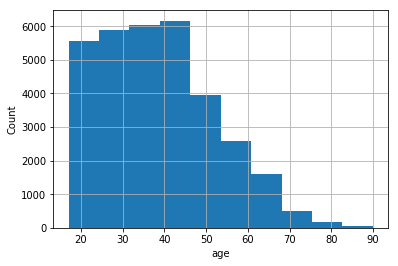

In [11]:
sourceVariable='age'
table = mltk.histogram(Data, sourceVariable, n_bins=10, orientation='vertical', show_plot=True)
table.style.background_gradient(cmap='Greens').set_precision(3)

# 4. Creating Feature Variables <a class="anchor" id="features"></a>
[^](#toc) 

## 4.1 Inspect Categorical Variables

In [12]:
categoryVariables = set({'sex', 'nativecountry', 'race', 'occupation', 'workclass', 'maritalstatus', 'relationship'})
binaryVariables = set({})
print(mltk.category_lists(Data, list(categoryVariables)))

{
    "sex": [
        "Female",
        "Male"
    ],
    "workclass": [
        "?",
        "Private",
        "State-gov",
        "Federal-gov",
        "Self-emp-not-inc",
        "Self-emp-inc",
        "Local-gov",
        "Without-pay",
        "Never-worked"
    ],
    "maritalstatus": [
        "Widowed",
        "Divorced",
        "Separated",
        "Never-married",
        "Married-civ-spouse",
        "Married-spouse-absent",
        "Married-AF-spouse"
    ],
    "race": [
        "White",
        "Black",
        "Asian-Pac-Islander",
        "Other",
        "Amer-Indian-Eskimo"
    ],
    "occupation": [
        "?",
        "Exec-managerial",
        "Machine-op-inspct",
        "Prof-specialty",
        "Other-service",
        "Adm-clerical",
        "Craft-repair",
        "Transport-moving",
        "Handlers-cleaners",
        "Sales",
        "Farming-fishing",
        "Tech-support",
        "Protective-serv",
        "Armed-Forces",
        "Priv-house-ser

## 4.2 Tranform Variables

In [13]:
transformations = [{ "variable":"age", "to": "normalizedage", "operation":"normalize", "parameters":{"method":"zscore"}}]
Data, transformed_variables = mltk.create_transformed_variables(Data, variable_operations=transformations, return_variables=True)

## 4.3 Merge Categories

In [14]:
category_merges = [{'variable':'maritalstatus', 'category_variable':'maritalstatus', 'group_value':'Married', 'values':["Married-civ-spouse", "Married-spouse-absent", "Married-AF-spouse"]}]
Data = mltk.merge_categories(Data, category_merges)

sourceVariable='maritalstatus'
table = mltk.variable_frequency(Data, variable=sourceVariable, show_plot=False)
table.style.background_gradient(cmap='Greens').set_precision(3)

,Counts,CountsFraction%
maritalstatus,,
Divorced,4443,13.6
Married,15417,47.3
Never-married,10683,32.8
Separated,1025,3.15
Widowed,993,3.05
TOTAL,32561,100


## 4.4 Response Rate For Categorical Variables

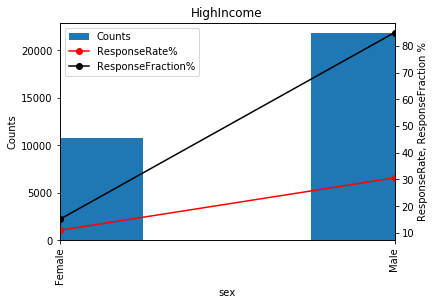

        Counts  HighIncome  CountsFraction%  ResponseFraction%  ResponseRate%
sex                                                                          
Female   10771        1179         33.07945           15.03635       10.94606
Male     21790        6662         66.92055           84.96365       30.57366
TOTAL    32561        7841        100.00000          100.00000        0.24081


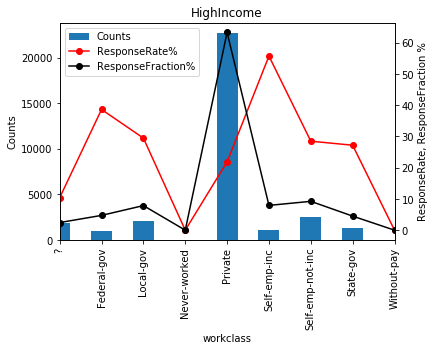

                  Counts  HighIncome  CountsFraction%  ResponseFraction%  ResponseRate%
workclass                                                                              
?                   1836         191          5.63865            2.43591       10.40305
Federal-gov          960         371          2.94831            4.73154       38.64583
Local-gov           2093         617          6.42794            7.86889       29.47922
Never-worked           7           0          0.02150            0.00000        0.00000
Private            22696        4963         69.70302           63.29550       21.86729
Self-emp-inc        1116         622          3.42741            7.93266       55.73477
Self-emp-not-inc    2541         724          7.80381            9.23352       28.49272
State-gov           1298         353          3.98636            4.50198       27.19569
Without-pay           14           0          0.04300            0.00000        0.00000
TOTAL              32561        

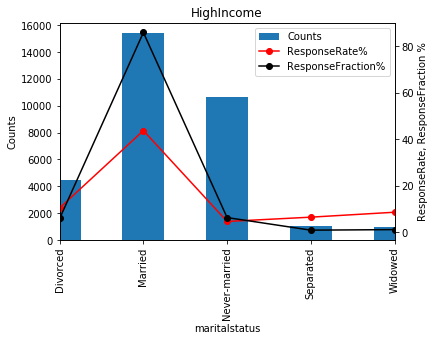

               Counts  HighIncome  CountsFraction%  ResponseFraction%  ResponseRate%
maritalstatus                                                                       
Divorced         4443         463         13.64516            5.90486       10.42089
Married         15417        6736         47.34805           85.90741       43.69203
Never-married   10683         491         32.80919            6.26196        4.59609
Separated        1025          66          3.14794            0.84173        6.43902
Widowed           993          85          3.04966            1.08405        8.55992
TOTAL           32561        7841        100.00000          100.00000        0.24081


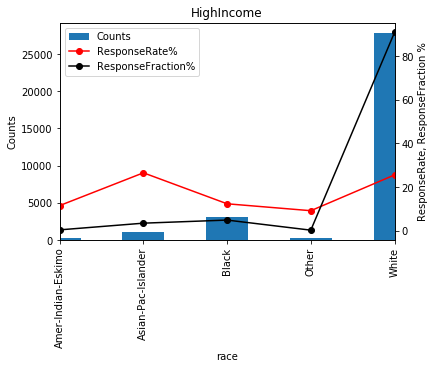

                    Counts  HighIncome  CountsFraction%  ResponseFraction%  ResponseRate%
race                                                                                     
Amer-Indian-Eskimo     311          36          0.95513            0.45913       11.57556
Asian-Pac-Islander    1039         276          3.19093            3.51996       26.56400
Black                 3124         387          9.59430            4.93559       12.38796
Other                  271          25          0.83228            0.31884        9.22509
White                27816        7117         85.42735           90.76648       25.58599
TOTAL                32561        7841        100.00000          100.00000        0.24081


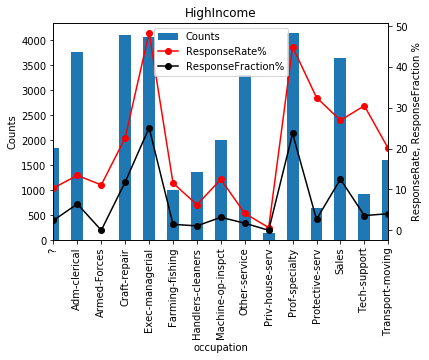

                   Counts  HighIncome  CountsFraction%  ResponseFraction%  ResponseRate%
occupation                                                                              
?                    1843         191          5.66015            2.43591       10.36354
Adm-clerical         3770         507         11.57827            6.46601       13.44828
Armed-Forces            9           1          0.02764            0.01275       11.11111
Craft-repair         4099         929         12.58868           11.84798       22.66406
Exec-managerial      4066        1968         12.48733           25.09884       48.40138
Farming-fishing       994         115          3.05273            1.46665       11.56942
Handlers-cleaners    1370          86          4.20749            1.09680        6.27737
Machine-op-inspct    2002         250          6.14846            3.18837       12.48751
Other-service        3295         137         10.11947            1.74723        4.15781
Priv-house-serv      

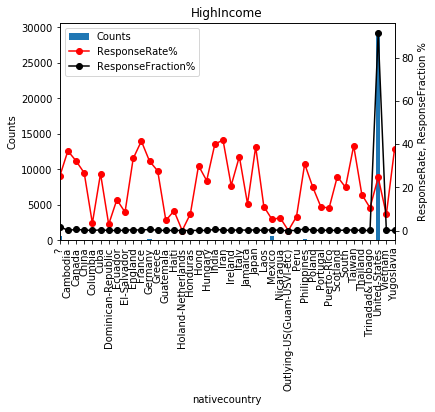

                            Counts  HighIncome  CountsFraction%  ResponseFraction%  ResponseRate%
nativecountry                                                                                    
?                              583         146          1.79049            1.86201       25.04288
Cambodia                        19           7          0.05835            0.08927       36.84211
Canada                         121          39          0.37161            0.49739       32.23140
China                           75          20          0.23034            0.25507       26.66667
Columbia                        59           2          0.18120            0.02551        3.38983
Cuba                            95          25          0.29176            0.31884       26.31579
Dominican-Republic              70           2          0.21498            0.02551        2.85714
Ecuador                         28           4          0.08599            0.05101       14.28571
El-Salvador         

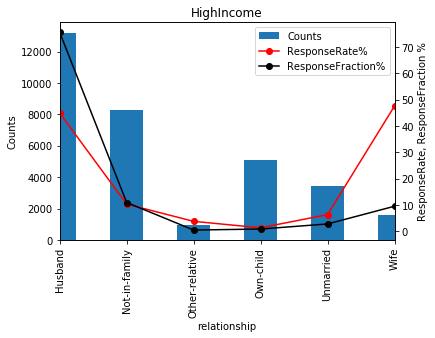

                Counts  HighIncome  CountsFraction%  ResponseFraction%  ResponseRate%
relationship                                                                         
Husband          13193        5918         40.51780           75.47507       44.85712
Not-in-family     8305         856         25.50597           10.91697       10.30704
Other-relative     981          37          3.01281            0.47188        3.77166
Own-child         5068          67         15.56463            0.85448        1.32202
Unmarried         3446         218         10.58321            2.78026        6.32618
Wife              1568         745          4.81558            9.50134       47.51276
TOTAL            32561        7841        100.00000          100.00000        0.24081


In [15]:
mltk.variable_responses(Data, variables=categoryVariables, target_variable=targetVariable, show_output=True, show_plot=True)

## 4.5 Create Categorical Variables from continious variables

               counts
age                  
1_[17,24.3]      5570
2_[24.3,31.6]    5890
3_[31.6,38.9]    6048
4_[38.9,46.2]    6163
5_[46.2,53.5]    3967
6_[53.5,60.8]    2591
7_[60.8,68.1]    1595
8_[68.1,75.4]     496
9_[75.4,82.7]     174
10_[82.7,90]       67
TOTAL           32561


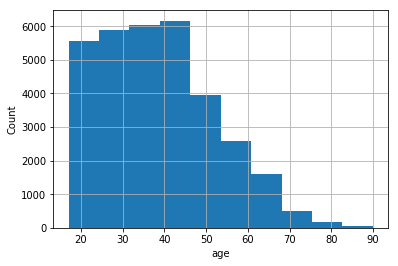

In [16]:
sourceVariable='age'
table = mltk.histogram(Data, sourceVariable, n_bins=10, orientation='vertical', show_plot=True)
print(table)

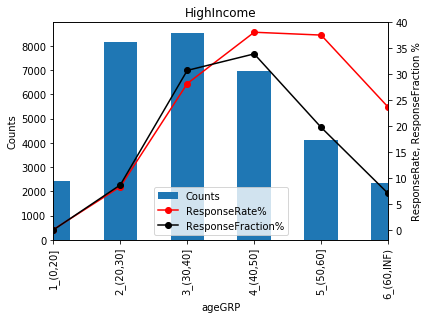

,Counts,HighIncome,CountsFraction%,ResponseFraction%,ResponseRate%
ageGRP,,,,,
"1_(0,20]",2410,2,7.40149,0.02551,0.08299
"2_(20,30]",8162,680,25.06680,8.67236,8.33129
"3_(30,40]",8546,2406,26.24612,30.68486,28.15352
"4_(40,50]",6983,2655,21.44590,33.86048,38.02091
"5_(50,60]",4128,1547,12.67774,19.72963,37.47578
"6_(60,INF)",2332,551,7.16194,7.02716,23.62779
TOTAL,32561,7841,100.00000,100.00000,0.24081


In [17]:
buckets = [{'variable':sourceVariable, 'category_variable':None,'str_labels':['0', '20', '30', '40', '50', '60', 'INF'], 'right_inclusive':True}]
Data, categoryVariable = mltk.create_categorical_variables(Data, buckets, return_variables=True)
categoryVariables.update(categoryVariable)
mltk.variable_response(DataFrame=Data, variable=categoryVariable, target_variable=targetVariable, show_plot=True)

,counts
educationnum,
"1_[1,2.5]",219
"2_[2.5,4]",333
"3_[4,5.5]",1160
"4_[5.5,7]",933
"5_[7,8.5]",1608
"6_[8.5,10]",10501
"7_[10,11.5]",8673
"8_[11.5,13]",1067
"9_[13,14.5]",7078


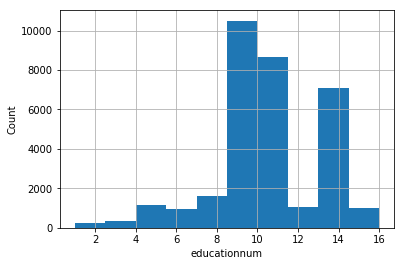

In [18]:
sourceVariable='educationnum'
mltk.histogram(Data, sourceVariable, n_bins=10, orientation='vertical', show_plot=True)

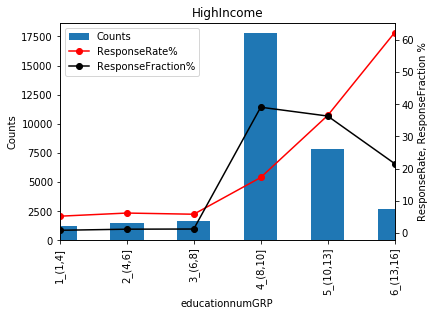

,Counts,HighIncome,CountsFraction%,ResponseFraction%,ResponseRate%
educationnumGRP,,,,,
"1_(1,4]",1198,62,3.67925,0.79072,5.17529
"2_(4,6]",1447,89,4.44397,1.13506,6.15066
"3_(6,8]",1608,93,4.93842,1.18607,5.78358
"4_(8,10]",17792,3062,54.64206,39.05114,17.20998
"5_(10,13]",7804,2847,23.96732,36.30914,36.48129
"6_(13,16]",2712,1688,8.32898,21.52787,62.24189
TOTAL,32561,7841,100.00000,100.00000,0.24081


In [19]:
buckets = [{'variable':sourceVariable, 'category_variable':None, 'str_labels':['1', '4', '6', '8', '10', '13', '16'], 'right_inclusive':True}]
Data, categoryVariable = mltk.create_categorical_variables(Data, buckets, return_variables=True)
categoryVariables.update(categoryVariable)
mltk.variable_response(DataFrame=Data, variable=categoryVariable, target_variable=targetVariable, show_plot=True)

,counts
hoursperweek,
"1_[1,10.8]",736
"2_[10.8,20.6]",2192
"3_[20.6,30.4]",2317
"4_[30.4,40.2]",17735
"5_[40.2,50]",3119
"6_[50,59.8]",3877
"7_[59.8,69.6]",1796
"8_[69.6,79.4]",448
"9_[79.4,89.2]",202


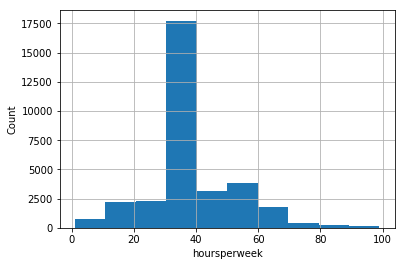

In [20]:
sourceVariable='hoursperweek'
mltk.histogram(Data, sourceVariable, n_bins=10, orientation='vertical', show_plot=True)

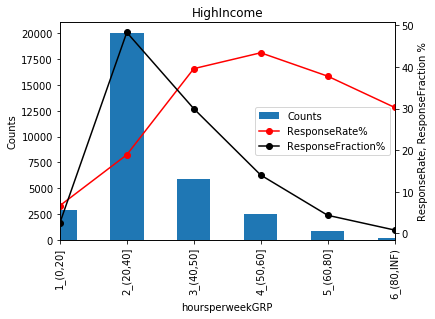

,Counts,HighIncome,CountsFraction%,ResponseFraction%,ResponseRate%
hoursperweekGRP,,,,,
"1_(0,20]",2928,195,8.99235,2.48693,6.65984
"2_(20,40]",20052,3790,61.58288,48.33567,18.90086
"3_(40,50]",5938,2352,18.23654,29.99617,39.60930
"4_(50,60]",2533,1100,7.77925,14.02882,43.42677
"5_(60,80]",902,341,2.77019,4.34894,37.80488
"6_(80,INF)",208,63,0.63880,0.80347,30.28846
TOTAL,32561,7841,100.00000,100.00000,0.24081


In [21]:
buckets = [{'variable':sourceVariable, 'category_variable':None,'str_labels':['0', '20', '40', '50', '60', '80', 'INF'], 'right_inclusive':True}]
Data, categoryVariable = mltk.create_categorical_variables(Data, buckets, return_variables=True)
categoryVariables.update(categoryVariable)
mltk.variable_response(DataFrame=Data, variable=categoryVariable, target_variable=targetVariable, show_plot=True)

#### 4.* Create ALL Variable from JSON input

In [22]:
variables_setup_dict = """   
{
    "setting":"model",
    
    "variables": {            
            "category_variables" : ["sex", "nativecountry", "race", "occupation", "workclass", "maritalstatus", "relationship"],
            "binary_variables": [],
            "target_variable":"HighIncome"
    },
    
    "target":{
        "type":"target",
        "variable_class": "bin",
        "include":true,
        "rule_set":[
            {
                "target_variable" : "HighIncome",
                "str_condition" : "income=='>50K'"
            }          
        ]

    },
        
    "transform": {
        "type":"transform",
        "variable_class": "num",
        "include":false,
        "show_output":false,
        "rule_set": [
            {
                "variable":"age", 
                "to": "normalizedage", 
                "operation":"normalize", 
                "parameters":{"method":"zscore"}
            },
            {
                "variable":"hoursperweek", 
                "to": "normalizedhoursperweek", 
                "operation":"normalize", 
                "parameters":{"method":"minmaxfs"}
            }
        ]
    },
        
    "conditions":{
        "type":"conditions",
        "variable_class": "bin",
        "include":true,
        "show_output":false,
        "rule_set":[        
            {
                "bin_variable":"CapitalGainPositive", 
                "str_condition":"capitalgain>0"
            },
            
            {
                "bin_variable":"CapitalLossPositive", 
                "str_condition":"capitalloss>0"
            }
        ]
    },
        
    "buckets":{
        "type":"buckets",
        "variable_class": "cat",
        "include":true,
        "show_output":false,
        "rule_set":[
            {
                "variable":"age", 
                "category_variable":null, 
                "str_labels":["0", "20", "30", "40", "50", "60", "INF"],
                "right_inclusive":true
            },
            {
                "variable":"educationnum", 
                "category_variable":null, 
                "str_labels":["1", "4", "6", "8", "10", "13", "16"],
                "right_inclusive":true
            },
            {
                "variable":"hoursperweek", 
                "category_variable":null, 
                "str_labels":["0", "20", "40", "50", "60", "80", "INF"],
                "right_inclusive":true
            }
        ]
    },
        
    "category_merges":{
        "type":"category_merges",
        "variable_class": "cat",
        "include":true,
        "show_output":false,
        "rule_set":[
            {
                "variable":"maritalstatus", 
                "category_variable":"maritalstatus", 
                "group_value":"Married", 
                "values":["Married-civ-spouse", "Married-spouse-absent", "Married-AF-spouse"]
            }
        ]
    },
        
    "pair_equality": {
        "type":"pair_equality",
        "variable_class": "cat",
        "include":false,
        "show_output":false,
        "rule_set":[
            {
                "variable1":"age", 
                "variable2":"hoursperweek",
                "category_variable":"TestGroup"
            }
        ]
    }
}
"""

Data, category_variables, binary_variables, target_variable  = mltk.setup_variables_task(Data, variables_setup_dict)

#### Usage Example:  String Similarity

,counts
maritalstatusSIMrelationship,
"1_[0.333333,0.452381]",130
"2_[0.452381,0.571429]",1332
"3_[0.571429,0.690476]",1601
"4_[0.690476,0.809524]",10538
"5_[0.809524,0.928571]",18960
TOTAL,32561


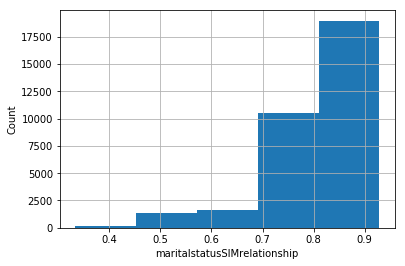

In [23]:
string_similarity = [{'variable1':'maritalstatus', 'variable2':'relationship', 'string_similarity_variable':None, 'metric':'levenshtein', 'case_sensitive':True, 'parameters':{'min_length':1, 'max_length':4000, 'normalize':True}}]
Data, string_similarity_variables = mltk.create_string_similarity_variables(Data, string_similarity=string_similarity, return_variables=True)
mltk.histogram(Data, string_similarity_variables[0], n_bins=5, orientation='vertical', show_plot=True)

,counts
maritalstatusSIMrelationship,
"1_[0.0114943,0.0876268]",31550
"2_[0.0876268,0.163759]",0
"3_[0.163759,0.239892]",0
"4_[0.239892,0.316024]",881
"5_[0.316024,0.392157]",130
TOTAL,32561


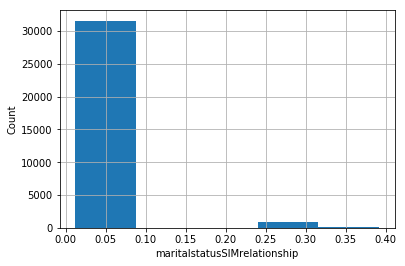

In [24]:
string_similarity = [{'variable1':'maritalstatus', 'variable2':'relationship', 'string_similarity_variable':None, 'metric':'jaccard', 'case_sensitive':True, 'parameters':{'min_length':1, 'max_length':4000, 'normalize':True}}]
Data, string_similarity_variables = mltk.create_string_similarity_variables(Data, string_similarity=string_similarity, return_variables=True)
mltk.histogram(Data, string_similarity_variables[0], n_bins=5, orientation='vertical', show_plot=True)

#### Usage Example: String Pattern Count

,counts
maritalstatusCNT,
"1_[7,8.2]",20853
"2_[8.2,9.4]",1025
"3_[9.4,10.6]",0
"4_[10.6,11.8]",0
"5_[11.8,13]",10683
TOTAL,32561


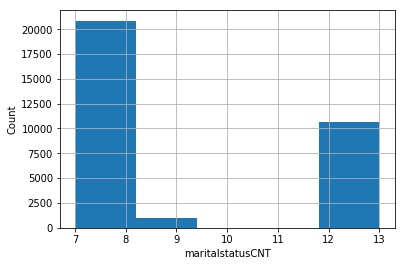

In [25]:
string_counts = [{'variable':'maritalstatus', 'count_variable':'maritalstatusCNT', 'criteria':'*', 'case_sensitive':True}]
Data, string_counts_variables = mltk.create_string_count_variables(Data, string_counts=string_counts, return_variables=True)
mltk.histogram(Data, string_counts_variables[0], n_bins=5, orientation='vertical', show_plot=True)

# 5. Create Modeling dataset <a class="anchor" id="input"></a>

### Feature/Predictor variables (X) and Response variable (y)
[^](#toc) 

## 5.1 Variables setup

In [26]:
identifierColumns = ['ID']
categoryVariables=list(categoryVariables)
binaryVariables=list(binaryVariables)
targetVariable = targetVariable

In [27]:
Data[identifierColumns+binaryVariables+categoryVariables+[targetVariable]].sample(5).transpose()
#mltk.plot_variable_responses(Data, variables=categoryVariables+binaryVariables, target_variable=targetVariable)

,25286,7250,23454,28969,5000
ID,25287,7251,23455,28970,5001
educationnumGRP,"4_(8,10]","5_(10,13]","5_(10,13]","2_(4,6]","4_(8,10]"
maritalstatus,Widowed,Married,Divorced,Married,Married
ageGRP,"6_(60,INF)","2_(20,30]","4_(40,50]","3_(30,40]","3_(30,40]"
relationship,Not-in-family,Husband,Unmarried,Husband,Husband
sex,Female,Male,Female,Male,Male
workclass,Private,Private,Private,Federal-gov,Self-emp-inc
hoursperweekGRP,"1_(0,20]","2_(20,40]","2_(20,40]","2_(20,40]","4_(50,60]"
race,White,White,Black,White,White
occupation,Adm-clerical,Prof-specialty,Sales,Machine-op-inspct,Craft-repair


## 5.2 Create One Hot Encoded Variables

In [28]:
Data, featureVariables, targetVariable = mltk.to_one_hot_encode(Data, category_variables=categoryVariables, binary_variables=binaryVariables, target_variable=targetVariable)
Data[identifierColumns+featureVariables+[targetVariable]].sample(5).transpose()

,25361,25288,26834,7736,32207
ID,25362,25289,26835,7737,32208
"educationnumGRP_1_(1,4]",0,0,0,0,0
"educationnumGRP_2_(4,6]",0,0,0,0,0
"educationnumGRP_3_(6,8]",0,0,0,0,0
"educationnumGRP_4_(8,10]",1,1,1,0,1
"educationnumGRP_5_(10,13]",0,0,0,1,0
"educationnumGRP_6_(13,16]",0,0,0,0,0
maritalstatus_Divorced,0,0,1,1,0
maritalstatus_Married,0,1,0,0,1
maritalstatus_Never-married,1,0,0,0,0


## 5.3 Analyze Correlation

In [29]:
correlation=mltk.correlation_matrix(Data, featureVariables+[targetVariable], target_variable=targetVariable, method='pearson', return_type='list', show_plot=False)
correlation.head(10).style.background_gradient(cmap='RdYlGn').set_precision(3)

,Variable1,Variable2,Correlation,|Correlation|,corrTargetVariable1,corrTargetVariable2
2070,sex_Female,sex_Male,-1,1,-0.216,0.216
2244,workclass_?,occupation_?,0.998,0.998,-0.0782,-0.0786
695,maritalstatus_Married,relationship_Husband,0.87,0.87,0.435,0.401
3382,race_Black,race_White,-0.789,0.789,-0.0891,0.0852
686,maritalstatus_Married,maritalstatus_Never-married,-0.663,0.663,0.435,-0.318
300,"educationnumGRP_4_(8,10]","educationnumGRP_5_(10,13]",-0.616,0.616,-0.176,0.163
2940,"hoursperweekGRP_2_(20,40]","hoursperweekGRP_3_(40,50]",-0.598,0.598,-0.153,0.172
1586,relationship_Husband,sex_Female,-0.58,0.58,0.401,-0.216
1587,relationship_Husband,sex_Male,0.58,0.58,0.401,0.216
788,maritalstatus_Never-married,relationship_Husband,-0.577,0.577,-0.318,0.401


## Split data to train and test datasets

In [30]:
TrainDataset, ValidateDataset, TestDataset = mltk.train_validate_test_split(Data, ratios=(0.6,0.2,0.2))

Train Samples: 19536 [60.0%]
Validate Samples: 6512 [20.0%]
Test Samples: 6513 [20.0%]


# 6. Run classifier algorithms <a class="anchor" id="model"></a>
[^](#toc) 

## 6.1 Model Variables

In [31]:
# Run classifier algorithms
#model_variables = featureVariables
modelVariables = [
# 'workclass_?',
 'workclass_Federal-gov',
 'workclass_Local-gov',
# 'workclass_Never-worked',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
# 'workclass_Without-pay',
 'workclass_Private',
 'sex_Female',
# 'sex_Male',
# 'ageGRP_1_(0,20]',
 'ageGRP_2_(20,30]',
 'ageGRP_3_(30,40]',
 'ageGRP_4_(40,50]',
 'ageGRP_5_(50,60]',
# 'ageGRP_6_(60,INF)',
# 'nativecountry_?',
# 'nativecountry_Cambodia',
# 'nativecountry_Canada',
# 'nativecountry_China',
# 'nativecountry_Columbia',
# 'nativecountry_Cuba',
# 'nativecountry_Dominican-Republic',
# 'nativecountry_Ecuador',
# 'nativecountry_El-Salvador',
# 'nativecountry_England',
# 'nativecountry_France',
# 'nativecountry_Germany',
# 'nativecountry_Greece',
# 'nativecountry_Guatemala',
# 'nativecountry_Haiti',
# 'nativecountry_Holand-Netherlands',
# 'nativecountry_Honduras',
# 'nativecountry_Hong',
# 'nativecountry_Hungary',
# 'nativecountry_India',
# 'nativecountry_Iran',
# 'nativecountry_Ireland',
# 'nativecountry_Italy',
# 'nativecountry_Jamaica',
# 'nativecountry_Japan',
# 'nativecountry_Laos',
# 'nativecountry_Mexico',
# 'nativecountry_Nicaragua',
# 'nativecountry_Outlying-US(Guam-USVI-etc)',
# 'nativecountry_Peru',
# 'nativecountry_Philippines',
# 'nativecountry_Poland',
# 'nativecountry_Portugal',
# 'nativecountry_Puerto-Rico',
# 'nativecountry_Scotland',
# 'nativecountry_South',
# 'nativecountry_Taiwan',
# 'nativecountry_Thailand',
# 'nativecountry_Trinadad&Tobago',
# 'nativecountry_United-States',
# 'nativecountry_Vietnam',
# 'nativecountry_Yugoslavia',
 'hoursperweekGRP_1_(0,20]',
 'hoursperweekGRP_2_(20,40]',
 'hoursperweekGRP_3_(40,50]',
 'hoursperweekGRP_4_(50,60]',
# 'hoursperweekGRP_5_(60,80]',
# 'hoursperweekGRP_6_(80,INF)',
# 'occupation_?',
 'occupation_Adm-clerical',
# 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
# 'occupation_Priv-house-serv',
 'occupation_Prof-specialty',
 'occupation_Protective-serv',
 'occupation_Sales',
 'occupation_Tech-support',
# 'occupation_Transport-moving',
 'educationnumGRP_1_(1,4]',
 'educationnumGRP_2_(4,6]',
 'educationnumGRP_3_(6,8]',
 'educationnumGRP_4_(8,10]',
 'educationnumGRP_5_(10,13]',
# 'educationnumGRP_6_(13,16]',
 'relationship_Husband',
 'relationship_Not-in-family',
 'relationship_Other-relative',
 'relationship_Own-child',
 'relationship_Unmarried',
# 'relationship_Wife',       
 'race_Amer-Indian-Eskimo',
 'race_Asian-Pac-Islander',
 'race_Black',
 'race_Other',
# 'race_White', 
 'maritalstatus_Divorced',
 'maritalstatus_Married',
# 'maritalstatus_Married-AF-spouse',
# 'maritalstatus_Married-civ-spouse',
# 'maritalstatus_Married-spouse-absent',
 'maritalstatus_Never-married',
 'maritalstatus_Separated',
# 'maritalstatus_Widowed'
 ]

## 6.2 Model Setup

In [32]:
sample_attributes = {'SampleDescription':'Adult Census Income Dataset',
                    'NumClasses':2,
                    'RecordIdentifiers':identifierColumns
                    }

score_parameters = {'Edges':[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                   'Quantiles':10,
                   'ScoreVariable':'Probability',
                   'ScoreLabel':'Score',
                   'QuantileLabel':'Quantile'
                   }

model_attributes = {'ModelID': None,   
                   'ModelName': 'IncomeLevel',
                   'Version':'0.1',
                   }

## 6.3 Models

## 6.3.1 Logistic Regression

Train samples: 19536 loded...
Validate samples: 6512 loded...
Test samples: 6513 loded...
{'ModelID': 'INCOMELEVELLGR20190728184435', 'ModelName': 'IncomeLevel', 'Version': '0.1', 'BuiltTime': '20190728184435', 'ModelFitTime': -1}
{'MLAlgorithm': 'LGR', 'MaxIterations': 100}
{'SampleDescription': 'Adult Census Income Dataset', 'NumClasses': 2, 'RecordIdentifiers': ['ID'], 'TrainSize': 19536, 'ValidateSize': 6512, 'TestSize': 6513, 'TrainValidateTestRatio': '[0.6 0.2 0.2]', 'TrainResponseRate': 0.24032555282555282, 'ValidateResponseRate': 0.2433968058968059, 'TestResponseRate': 0.2396744971595271}
{'Edges': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'Quantiles': 10, 'ScoreVariable': 'Probability', 'ScoreLabel': 'Score', 'QuantileLabel': 'Quantile'}
Optimization terminated successfully.
         Current function value: 0.346537
         Iterations 9


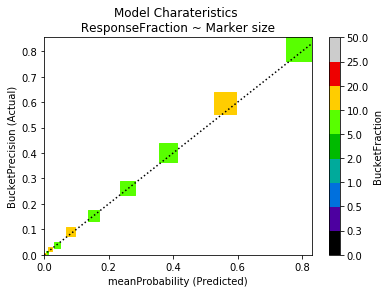

In [33]:
model_parameters = {'MLAlgorithm':'LGR', # 'RF', # 'DFF', # 'CNN', # 'CATBST', # 'XGBST'
                    'MaxIterations':100}  

LGRModel = mltk.build_ml_model(TrainDataset, ValidateDataset, TestDataset, 
                                  model_variables=modelVariables,
                                  variable_setup = None,
                                  target_variable=targetVariable,
                                  model_attributes=model_attributes, 
                                  sample_attributes=sample_attributes, 
                                  model_parameters=model_parameters, 
                                  score_parameters=score_parameters, 
                                  return_model_object=True, 
                                  show_results=False, 
                                  show_plot=True
                                  )

In [34]:
print(LGRModel.model_attributes['ModelID'])
print(LGRModel.model_interpretation['ModelSummary'])
print('ROC AUC: ', LGRModel.get_auc(curve='roc'))
print('PRC AUC: ', LGRModel.get_auc(curve='prc'))
#print(LGRModel.model_evaluation['RobustnessTable'])

INCOMELEVELLGR20190728184435
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                19536
Model:                          Logit   Df Residuals:                    19492
Method:                           MLE   Df Model:                           43
Date:                Sun, 28 Jul 2019   Pseudo R-squ.:                  0.3716
Time:                        18:44:35   Log-Likelihood:                -6770.0
converged:                       True   LL-Null:                       -10773.
                                        LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
workclass_Federal-gov            0.9024      0.189      4.772      0.000       0.532       1.273
workclass_Local-gov              0.0756      0.1

In [35]:
LGRModel.model_evaluation['RobustnessTable'].style.background_gradient(cmap='RdYlGn').set_precision(3)

,minProbability,maxProbability,meanProbability,BucketCount,ResponseCount,BucketFraction,ResponseFraction,BucketPrecision,CumulativeBucketFraction,CumulativeResponseFraction,CumulativePrecision
Quantile,,,,,,,,,,,
1,0.000357,0.00532,0.00303,653,3,0.1,0.00192,0.00459,1,1,0.24
2,0.00534,0.0125,0.00876,650,6,0.0998,0.00384,0.00923,0.9,0.998,0.266
3,0.0125,0.0257,0.0188,653,15,0.1,0.00961,0.023,0.8,0.994,0.298
4,0.0257,0.0552,0.0393,649,25,0.0996,0.016,0.0385,0.7,0.985,0.337
5,0.0553,0.112,0.0811,653,59,0.1,0.0378,0.0904,0.6,0.969,0.387
6,0.112,0.201,0.153,650,101,0.0998,0.0647,0.155,0.5,0.931,0.446
7,0.201,0.315,0.258,651,171,0.1,0.11,0.263,0.4,0.866,0.519
8,0.315,0.464,0.384,651,262,0.1,0.168,0.402,0.3,0.757,0.604
9,0.464,0.677,0.561,652,389,0.1,0.249,0.597,0.2,0.589,0.705


## 6.3.2 Random Forest Classifier

Train samples: 19536 loded...
Validate samples: 6512 loded...
Test samples: 6513 loded...
{'ModelID': 'INCOMELEVELRF20190728184436', 'ModelName': 'IncomeLevel', 'Version': '0.1', 'BuiltTime': '20190728184436', 'ModelFitTime': -1}
{'MLAlgorithm': 'RF', 'NTrees': 500, 'MaxDepth': 200, 'MinSamplesToSplit': 10, 'Processors': 2}
{'SampleDescription': 'Adult Census Income Dataset', 'NumClasses': 2, 'RecordIdentifiers': ['ID'], 'TrainSize': 19536, 'ValidateSize': 6512, 'TestSize': 6513, 'TrainValidateTestRatio': '[0.6 0.2 0.2]', 'TrainResponseRate': 0.24032555282555282, 'ValidateResponseRate': 0.2433968058968059, 'TestResponseRate': 0.2396744971595271}
{'Edges': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'Quantiles': 10, 'ScoreVariable': 'Probability', 'ScoreLabel': 'Score', 'QuantileLabel': 'Quantile'}


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    4.1s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    4.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.3s finished


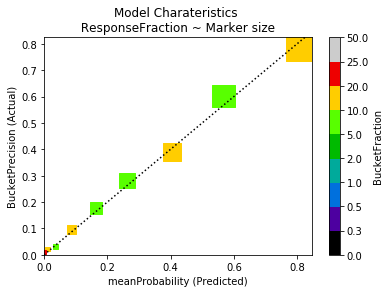

In [36]:
model_parameters = {'MLAlgorithm':'RF', # 'LGR', #  'DFF', # 'CNN', # 'CATBST', # 'XGBST'
                    'NTrees':500,
                   'MaxDepth':200,
                   'MinSamplesToSplit':10,
                   'Processors':2} 

RFModel = mltk.build_ml_model(TrainDataset, ValidateDataset, TestDataset, 
                                  model_variables=modelVariables,
                                  variable_setup = None,
                                  target_variable=targetVariable,
                                  model_attributes=model_attributes, 
                                  sample_attributes=sample_attributes, 
                                  model_parameters=model_parameters, 
                                  score_parameters=score_parameters, 
                                  return_model_object=True, 
                                  show_results=False, 
                                  show_plot=True
                                  )

In [37]:
print(RFModel.model_attributes['ModelID'])
print(RFModel.model_interpretation['ModelSummary'])
print('ROC AUC: ', RFModel.get_auc(curve='roc'))
print('PRC AUC: ', RFModel.get_auc(curve='prc'))
#print(RFModel.model_evaluation['RobustnessTable'])

INCOMELEVELRF20190728184436
                        Features  Importances    stdev
41         maritalstatus_Married      0.13858  0.12321
31          relationship_Husband      0.09785  0.10979
22     occupation_Prof-specialty      0.05570  0.01753
17    occupation_Exec-managerial      0.05534  0.01895
42   maritalstatus_Never-married      0.05142  0.06803
29      educationnumGRP_4_(8,10]      0.04032  0.01077
7               ageGRP_2_(20,30]      0.03474  0.01835
30     educationnumGRP_5_(10,13]      0.03472  0.01326
6                     sex_Female      0.02576  0.02277
32    relationship_Not-in-family      0.02457  0.02428
12     hoursperweekGRP_2_(20,40]      0.02367  0.00716
9               ageGRP_4_(40,50]      0.02267  0.00870
34        relationship_Own-child      0.02167  0.03280
13     hoursperweekGRP_3_(40,50]      0.02121  0.00950
26       educationnumGRP_1_(1,4]      0.01982  0.01013
3     workclass_Self-emp-not-inc      0.01958  0.00397
10              ageGRP_5_(50,60]     

In [38]:
RFModel.model_evaluation['RobustnessTable'].style.background_gradient(cmap='RdYlGn').set_precision(3)

,minProbability,maxProbability,meanProbability,BucketCount,ResponseCount,BucketFraction,ResponseFraction,BucketPrecision,CumulativeBucketFraction,CumulativeResponseFraction,CumulativePrecision
Quantile,,,,,,,,,,,
1,0,0.00393,0.000612,1303,13,0.2,0.00833,0.00998,1,1,0.24
2,0.00395,0.021,0.0109,652,14,0.1,0.00897,0.0215,0.8,0.992,0.297
3,0.0211,0.0569,0.0369,650,21,0.0998,0.0135,0.0323,0.7,0.983,0.337
4,0.0569,0.121,0.0872,655,62,0.101,0.0397,0.0947,0.6,0.969,0.387
5,0.122,0.207,0.165,648,114,0.0995,0.073,0.176,0.499,0.93,0.446
6,0.207,0.321,0.263,651,183,0.1,0.117,0.281,0.4,0.857,0.513
7,0.321,0.47,0.405,671,261,0.103,0.167,0.389,0.3,0.739,0.591
8,0.47,0.669,0.567,631,381,0.0969,0.244,0.604,0.197,0.572,0.696
9,0.67,1,0.807,652,512,0.1,0.328,0.785,0.1,0.328,0.785


## 6.3.3 Deep Feed Forward Neural Network

In [39]:
inputShape = (len(modelVariables),)
architecture = {
        'L1':{'type': 'Dense', 'position':'input', 'units': 512, 'activation':'relu', 'input_shape':inputShape},
        'L2':{'type': 'Dense', 'position':'hidden', 'units': 512, 'activation':'relu'},
        'L3':{'type': 'Dropout', 'position':'hidden', 'rate':0.5},
        'L4':{'type': 'Dense', 'position':'output', 'units': 2, 'activation':'softmax', 'output_shape':None},
       }

Train samples: 19536 loded...
Validate samples: 6512 loded...
Test samples: 6513 loded...
{'ModelID': 'INCOMELEVELNN20190728184442', 'ModelName': 'IncomeLevel', 'Version': '0.1', 'BuiltTime': '20190728184442', 'ModelFitTime': -1}
{'MLAlgorithm': 'NN', 'BatchSize': 512, 'InputShape': (44,), 'NumClasses': 2, 'Epochs': 10, 'EvalMatrics': ['accuracy'], 'Architecture': {'L1': {'type': 'Dense', 'position': 'input', 'units': 512, 'activation': 'relu', 'input_shape': (44,)}, 'L2': {'type': 'Dense', 'position': 'hidden', 'units': 512, 'activation': 'relu'}, 'L3': {'type': 'Dropout', 'position': 'hidden', 'rate': 0.5}, 'L4': {'type': 'Dense', 'position': 'output', 'units': 2, 'activation': 'softmax', 'output_shape': None}}}
{'SampleDescription': 'Adult Census Income Dataset', 'NumClasses': 2, 'RecordIdentifiers': ['ID'], 'TrainSize': 19536, 'ValidateSize': 6512, 'TestSize': 6513, 'TrainValidateTestRatio': '[0.6 0.2 0.2]', 'TrainResponseRate': 0.24032555282555282, 'ValidateResponseRate': 0.243396

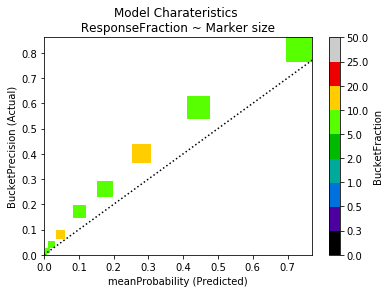

In [40]:
model_parameters = {'MLAlgorithm':'NN',
                    'BatchSize':512,
                   'InputShape':inputShape,
                   'NumClasses':2,
                   'Epochs':10,
                   'EvalMatrics':['accuracy'],
                   'Architecture':architecture} 

NNModel = mltk.build_ml_model(TrainDataset, ValidateDataset, TestDataset, 
                                  model_variables=modelVariables,
                                  variable_setup = None,
                                  target_variable=targetVariable,
                                  model_attributes=model_attributes, 
                                  sample_attributes=sample_attributes, 
                                  model_parameters=model_parameters, 
                                  score_parameters=score_parameters, 
                                  return_model_object=True, 
                                  show_results=False, 
                                  show_plot=True
                                  )

In [41]:
print(NNModel.model_attributes['ModelID'])
print(NNModel.model_interpretation['ModelSummary'])
print('ROC AUC: ', NNModel.get_auc(curve='roc'))
print('PRC AUC: ', NNModel.get_auc(curve='prc'))
#print(NNModel.model_evaluation['RobustnessTable'])

INCOMELEVELNN20190728184442
      loss      acc  val_loss  val_acc
0  0.41209  0.79940   0.37521  0.82095
1  0.36187  0.83108   0.36767  0.82601
2  0.35401  0.83420   0.37614  0.81956
3  0.35225  0.83267   0.36932  0.82356
4  0.34786  0.83630   0.37788  0.82402
5  0.34554  0.83758   0.36613  0.82463
6  0.34208  0.83886   0.40511  0.79576
7  0.34169  0.83907   0.35966  0.82878
8  0.34043  0.84014   0.35909  0.82770
9  0.33731  0.84239   0.37810  0.81895
ROC AUC:  0.8908904729477293
PRC AUC:  0.7204513440545235


In [42]:
NNModel.model_evaluation['RobustnessTable'].style.background_gradient(cmap='RdYlGn').set_precision(3)

,minProbability,maxProbability,meanProbability,BucketCount,ResponseCount,BucketFraction,ResponseFraction,BucketPrecision,CumulativeBucketFraction,CumulativeResponseFraction,CumulativePrecision
Quantile,,,,,,,,,,,
1,9.85e-05,0.00161,0.000798,653,3,0.1,0.00192,0.00459,1,1,0.24
2,0.00161,0.00461,0.00288,651,4,0.1,0.00256,0.00614,0.9,0.998,0.266
3,0.00461,0.0123,0.00797,650,12,0.0998,0.00769,0.0185,0.8,0.996,0.298
4,0.0123,0.0294,0.0196,651,27,0.1,0.0173,0.0415,0.7,0.988,0.338
5,0.0294,0.0683,0.0465,653,54,0.1,0.0346,0.0827,0.6,0.971,0.388
6,0.0684,0.137,0.0994,650,112,0.0998,0.0717,0.172,0.5,0.936,0.449
7,0.137,0.218,0.173,651,171,0.1,0.11,0.263,0.4,0.864,0.518
8,0.219,0.348,0.278,652,263,0.1,0.168,0.403,0.3,0.755,0.603
9,0.348,0.573,0.444,651,381,0.1,0.244,0.585,0.2,0.586,0.703


### 6.4 CatBoost

Train samples: 19536 loded...
Validate samples: 6512 loded...
Test samples: 6513 loded...
{'ModelID': 'INCOMELEVELCBST20190728184506', 'ModelName': 'IncomeLevel', 'Version': '0.1', 'BuiltTime': '20190728184506', 'ModelFitTime': -1}
{'MLAlgorithm': 'CBST', 'NTrees': 500, 'MaxDepth': 10, 'LearningRate': 0.7, 'LossFunction': 'Logloss', 'EvalMatrics': 'Accuracy', 'Imbalanced': False, 'TaskType': 'GPU', 'Processors': 2, 'UseBestModel': True}
{'SampleDescription': 'Adult Census Income Dataset', 'NumClasses': 2, 'RecordIdentifiers': ['ID'], 'TrainSize': 19536, 'ValidateSize': 6512, 'TestSize': 6513, 'TrainValidateTestRatio': '[0.6 0.2 0.2]', 'TrainResponseRate': 0.24032555282555282, 'ValidateResponseRate': 0.2433968058968059, 'TestResponseRate': 0.2396744971595271}
{'Edges': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'Quantiles': 10, 'ScoreVariable': 'Probability', 'ScoreLabel': 'Score', 'QuantileLabel': 'Quantile'}


0:	learn: 0.8240172	test: 0.8135749	best: 0.8135749 (0)	total: 277ms	remaining: 2m 18s
50:	learn: 0.8486384	test: 0.8258600	best: 0.8263206 (44)	total: 6.14s	remaining: 54s
100:	learn: 0.8492015	test: 0.8258600	best: 0.8263206 (44)	total: 9s	remaining: 35.6s
150:	learn: 0.8509930	test: 0.8255528	best: 0.8275491 (134)	total: 12.6s	remaining: 29.1s
200:	learn: 0.8517609	test: 0.8246314	best: 0.8275491 (134)	total: 15.5s	remaining: 23.1s
250:	learn: 0.8538595	test: 0.8232494	best: 0.8275491 (134)	total: 19.7s	remaining: 19.5s
300:	learn: 0.8543714	test: 0.8240172	best: 0.8275491 (134)	total: 22.6s	remaining: 15s
350:	learn: 0.8566749	test: 0.8244779	best: 0.8275491 (134)	total: 26.1s	remaining: 11.1s
400:	learn: 0.8567772	test: 0.8246314	best: 0.8275491 (134)	total: 28.6s	remaining: 7.07s
450:	learn: 0.8567772	test: 0.8247850	best: 0.8275491 (134)	total: 31.4s	remaining: 3.42s
499:	learn: 0.8568796	test: 0.8247850	best: 0.8275491 (134)	total: 34.3s	remaining: 0us
bestTest = 0.82754914
bes

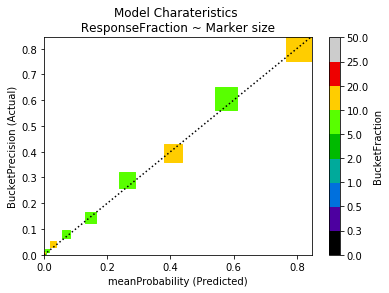

In [43]:
model_parameters = {'MLAlgorithm':'CBST',
                    'NTrees': 500,
                    'MaxDepth':10,
                    'LearningRate':0.7,
                    'LossFunction':'Logloss',#crossEntropy
                    'EvalMatrics':'Accuracy',
                    'Imbalanced':False,
                    'TaskType':'GPU',
                    'Processors':2,
                    'UseBestModel':True}

CBSTModel = mltk.build_ml_model(TrainDataset, ValidateDataset, TestDataset, 
                                  model_variables=modelVariables,
                                  variable_setup = None,
                                  target_variable=targetVariable,
                                  model_attributes=model_attributes, 
                                  sample_attributes=sample_attributes, 
                                  model_parameters=model_parameters, 
                                  score_parameters=score_parameters, 
                                  return_model_object=True, 
                                  show_results=False, 
                                  show_plot=True
                                  )

In [44]:
print(CBSTModel.model_attributes['ModelID'])
print(CBSTModel.model_interpretation['ModelSummary'])
print('ROC AUC: ', CBSTModel.get_auc(curve='roc'))
print('PRC AUC: ', CBSTModel.get_auc(curve='prc'))
#print(CBSTModel.model_evaluation['RobustnessTable'])

INCOMELEVELCBST20190728184506
                        Features  Importances
41         maritalstatus_Married     26.63807
7               ageGRP_2_(20,30]      5.34172
34        relationship_Own-child      4.88603
17    occupation_Exec-managerial      4.73482
11      hoursperweekGRP_1_(0,20]      4.32466
22     occupation_Prof-specialty      4.14296
6                     sex_Female      3.59569
28       educationnumGRP_3_(6,8]      3.27769
32    relationship_Not-in-family      3.06810
21      occupation_Other-service      2.90367
29      educationnumGRP_4_(8,10]      2.76991
26       educationnumGRP_1_(1,4]      2.40345
30     educationnumGRP_5_(10,13]      2.34841
12     hoursperweekGRP_2_(20,40]      2.29856
27       educationnumGRP_2_(4,6]      2.25334
31          relationship_Husband      2.21863
38                    race_Black      2.21399
35        relationship_Unmarried      2.01387
24              occupation_Sales      1.91207
42   maritalstatus_Never-married      1.45252
20  

In [45]:
CBSTModel.model_evaluation['RobustnessTable'].style.background_gradient(cmap='RdYlGn').set_precision(3)

,minProbability,maxProbability,meanProbability,BucketCount,ResponseCount,BucketFraction,ResponseFraction,BucketPrecision,CumulativeBucketFraction,CumulativeResponseFraction,CumulativePrecision
Quantile,,,,,,,,,,,
1,1.43e-06,0.00134,0.000468,652,5,0.1,0.0032,0.00767,1,1,0.24
2,0.00135,0.00543,0.00312,651,6,0.1,0.00384,0.00922,0.9,0.997,0.265
3,0.00543,0.0165,0.0103,651,11,0.1,0.00705,0.0169,0.8,0.993,0.298
4,0.0165,0.0421,0.0277,653,28,0.1,0.0179,0.0429,0.7,0.986,0.338
5,0.0423,0.103,0.069,651,52,0.1,0.0333,0.0799,0.6,0.968,0.387
6,0.104,0.196,0.148,650,95,0.0998,0.0609,0.146,0.5,0.935,0.448
7,0.197,0.338,0.263,651,189,0.1,0.121,0.29,0.4,0.874,0.524
8,0.338,0.487,0.409,653,257,0.1,0.165,0.394,0.3,0.753,0.601
9,0.487,0.688,0.576,649,394,0.0996,0.252,0.607,0.2,0.588,0.706


### 6.* Build Model using JSON input

In [46]:
model_setup_dict="""
{
    "sample_split": [0.6, 0.2, 0.2],
    
    "sample_attributes" : {
        "SampleDescription":"Adult Census Income Dataset",
        "NumClasses":2,
        "RecordIdentifiers": ["ID"]
    },
    
    "score_parameters" : {
        "Edges":[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        "Quantiles":10,
        "ScoreVariable":"Probability",
        "ScoreLabel":"Score",
        "QuantileLabel":"Quantile"
    },
    
    "model_attributes" : {
        "ModelID": null,   
        "ModelName": "IncomeLevel",
        "Version":"0.1"
    },
    
    "model_parameters" : {
        "MLAlgorithm":"LGR", 
        "MaxIterations":100
    },
        
    "model_outputs" : {
        "return_model_object":true, 
        "show_results":false, 
        "show_plot":false
    },
    
    "target_variable": "HighIncome",
        
    "model_variables" : [
            "workclass_Federal-gov",
            "workclass_Local-gov",
            "workclass_Self-emp-inc",
            "workclass_Self-emp-not-inc",
            "workclass_State-gov",
            "workclass_Private",
            "sex_Female",
            "ageGRP_2_(20,30]",
            "ageGRP_3_(30,40]",
            "ageGRP_4_(40,50]",
            "ageGRP_5_(50,60]",
            "hoursperweekGRP_1_(0,20]",
            "hoursperweekGRP_2_(20,40]",
            "hoursperweekGRP_3_(40,50]",
            "hoursperweekGRP_4_(50,60]",
            "occupation_Adm-clerical",
            "occupation_Craft-repair",
            "occupation_Exec-managerial",
            "occupation_Farming-fishing",
            "occupation_Handlers-cleaners",
            "occupation_Machine-op-inspct",
            "occupation_Other-service",
            "occupation_Prof-specialty",
            "occupation_Protective-serv",
            "occupation_Sales",
            "occupation_Tech-support",
            "educationnumGRP_1_(1,4]",
            "educationnumGRP_2_(4,6]",
            "educationnumGRP_3_(6,8]",
            "educationnumGRP_4_(8,10]",
            "educationnumGRP_5_(10,13]",
            "relationship_Husband",
            "relationship_Not-in-family",
            "relationship_Other-relative",
            "relationship_Own-child",
            "relationship_Unmarried",
            "race_Amer-Indian-Eskimo",
            "race_Asian-Pac-Islander",
            "race_Black",
            "race_Other",
            "maritalstatus_Divorced",
            "maritalstatus_Married",
            "maritalstatus_Never-married",
            "maritalstatus_Separated"
    ]
}
"""

Data = {"TrainDataset":TrainDataset, "ValidateDataset":ValidateDataset, "TestDataset":TestDataset}
TestModel = mltk.build_ml_model_task(Data, model_setup_dict, variables_setup_dict=None)

Train samples: 19536 loded...
Validate samples: 6512 loded...
Test samples: 6513 loded...
{'ModelID': 'INCOMELEVELLGR20190728184542', 'ModelName': 'IncomeLevel', 'Version': '0.1', 'BuiltTime': '20190728184542', 'ModelFitTime': -1}
{'MLAlgorithm': 'LGR', 'MaxIterations': 100}
{'SampleDescription': 'Adult Census Income Dataset', 'NumClasses': 2, 'RecordIdentifiers': ['ID'], 'TrainSize': 19536, 'ValidateSize': 6512, 'TestSize': 6513, 'TrainValidateTestRatio': '[0.6 0.2 0.2]', 'TrainResponseRate': 0.24032555282555282, 'ValidateResponseRate': 0.2433968058968059, 'TestResponseRate': 0.2396744971595271}
{'Edges': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'Quantiles': 10, 'ScoreVariable': 'Probability', 'ScoreLabel': 'Score', 'QuantileLabel': 'Quantile'}
Optimization terminated successfully.
         Current function value: 0.346537
         Iterations 9


## 7. Model Evaluation (Performance Comparison) <a class="anchor" id="evaluate"></a>
[^](#toc) 

### 7.1 ROC Curve, True Positive Rate (TPR) vs.False Positive Rate (FPR)
#### References
* T. Fawcett, An introduction to ROC analysis, Pattern Recognition Letters, Volume 27, Issue 8, June 2006, Pages 861-874. doi.org/10.1016/j.patrec.2005.10.010. 
* sklearn.metrics.roc_curve, http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

Using matplotlib backend: Qt5Agg


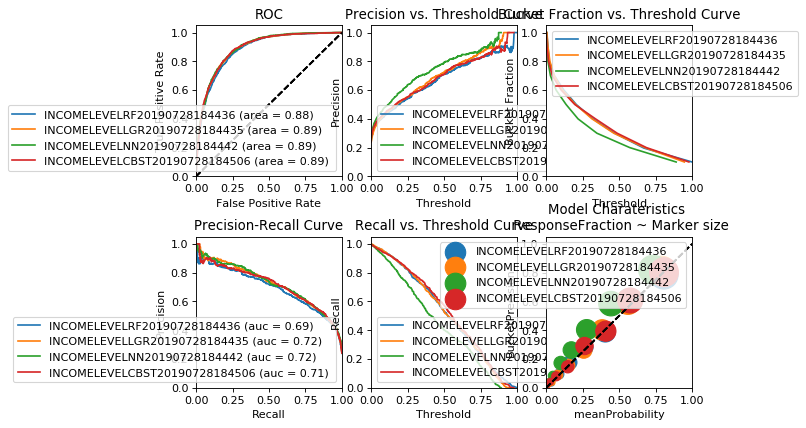

In [47]:
%matplotlib auto

RFModel.plot_eval_matrics(comparison=True)
LGRModel.plot_eval_matrics(comparison=True)
NNModel.plot_eval_matrics(comparison=True)
CBSTModel.plot_eval_matrics(comparison=True)

### Area Under Curve (AUC) Comparison

In [48]:
Models = [LGRModel, RFModel, CBSTModel, NNModel]
ModelsComp = mltk.model_guages_comparison(Models)
ModelsComp.style.background_gradient(cmap='RdYlGn').set_precision(3)

,Model,PRC_AUC,ROC_AUC
0,INCOMELEVELLGR20190728184435,0.72,0.889
1,INCOMELEVELRF20190728184436,0.694,0.881
2,INCOMELEVELCBST20190728184506,0.712,0.889
3,INCOMELEVELNN20190728184442,0.72,0.891


### 7.2 Generate scores

,minProbability,maxProbability,meanProbability,BucketCount,ResponseCount,BucketFraction,ResponseFraction,BucketPrecision,CumulativeBucketFraction,CumulativeResponseFraction,CumulativePrecision
Score,,,,,,,,,,,
1,0.000357,0.1,0.0275,3148,92,0.483,0.0589,0.0292,1,1,0.24
2,0.1,0.2,0.146,758,117,0.116,0.075,0.154,0.517,0.941,0.437
3,0.2,0.3,0.251,572,146,0.0878,0.0935,0.255,0.4,0.866,0.519
4,0.3,0.4,0.348,477,175,0.0732,0.112,0.367,0.312,0.773,0.593
5,0.4,0.5,0.45,427,209,0.0656,0.134,0.489,0.239,0.66,0.662
6,0.501,0.599,0.553,282,157,0.0433,0.101,0.557,0.174,0.527,0.727
7,0.601,0.7,0.654,286,198,0.0439,0.127,0.692,0.13,0.426,0.783
8,0.7,0.799,0.752,275,210,0.0422,0.135,0.764,0.0864,0.299,0.829
9,0.801,0.9,0.847,238,209,0.0365,0.134,0.878,0.0442,0.165,0.892


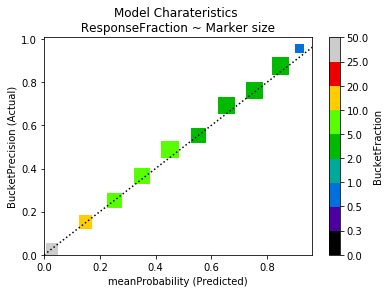

In [49]:
score_variable = LGRModel.get_score_variable()
score_label = LGRModel.get_score_label()

TestDataset = mltk.score_processed_dataset(TestDataset, LGRModel, edges=None, score_label=None, fill_missing=0)
Robustnesstable = mltk.robustness_table(ResultsSet=TestDataset, target_variable=targetVariable, score_variable=score_variable,  score_label=score_label, show_plot=True)
Robustnesstable.style.background_gradient(cmap='RdYlGn').set_precision(3)

### 7.3 Confusion Matrix [actual, predicted]

### Confusion Matrix Terms
#### For a Binary Classifier
* TN= CF[0,0], FP= CF[0,1], FN= CF[1,0], TP= CF[1,1]
* Accuracy (ACC) = (TP+TN)/TOTAL
* Hit Rate, Sensitivity, Recall or True Positive Rate (TPR) = TP/(TP+FN)
* False Positive Rate (FPR) = FP/(FP+TN) 
* Specificity or True Negative Rate (TNR) = TN/(FP+TN)
* Miss Rate or False Negative rate (FNR) = FN/(FN+TP) 
* Positive Predictive Value or Precision (PPV) = TP/(TP+FP) 
* Harmonic Mean of Precision and Sensitivity or F1 score (F1) = 2TP/(2TP+FP+FN)

#### For a Multi-class Classifier
* TPS = Diagonal(CF)
* SUCCESS = Sum(TPS)
* Sum of Actual Conditions (ASUM) = RowSum(CF)
* Sum of Predicted conditions (PSUM) = ColumnsSum(CF)
* Positive Predictive Value or Precision for Class i (PPV[i]) = TPS[i]/PSUM
* Hit Rate, Sensitivity, Recall or True Positive Rate for Class i (TPR[i]) = TPS[i]/ASUM

##### References: 
* C. Beleites, R. Salzer, V. Sergo, Validation of soft classification models using partial class memberships: An extended concept of sensitivity & co. applied to grading of astrocytoma tissues, Chemometrics and Intelligent Laboratory Systems Volume 122, 15 March 2013, Pages 12-22. doi.org/10.1016/j.chemolab.2012.12.003.
* sklearn.metrics.confusion_matrix, http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
* Confusion Matrix, http://www2.cs.uregina.ca/~dbd/cs831/notes/ROC/ROC.html.




In [50]:
score_variable = LGRModel.get_score_variable()
score_label = LGRModel.get_score_label()

threshold = 0.8
TestDataset = mltk.set_predicted_columns(TestDataset, score_variable, threshold=threshold)
ConfusionMatrix = mltk.confusion_matrix(TestDataset, actual_variable=targetVariable, predcted_variable='Predicted', labels=[0,1], sample_weight=None, totals=True)
ConfusionMatrix.style.background_gradient(cmap='Greens').set_precision(3)  

### 7.3 Comparison of Models and Thresholds

#### Probabilty Threshold

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.4s finished


6513/6513 [==============================] - 0s 6us/sample


,ModelID,TN,FP,FN,TP,TOTAL,P1,P0,A1,A0,TPR,TNR,FPR,FNR,PPV,ACC,F1
0,INCOMELEVELLGR20190728184435_[TH=0.7],4856,96,1094,467,6513,563,5950,1561,4952,0.299,0.981,0.0194,0.701,0.829,0.817,0.44
1,INCOMELEVELLGR20190728184435_[TH=0.8],4921,31,1304,257,6513,288,6225,1561,4952,0.165,0.994,0.00626,0.835,0.892,0.795,0.278
2,INCOMELEVELLGR20190728184435_[TH=0.9],4950,2,1513,48,6513,50,6463,1561,4952,0.0307,1,0.000404,0.969,0.96,0.767,0.0596
3,INCOMELEVELRF20190728184436_[TH=0.7],4845,107,1090,471,6513,578,5935,1561,4952,0.302,0.978,0.0216,0.698,0.815,0.816,0.44
4,INCOMELEVELRF20190728184436_[TH=0.8],4899,53,1285,276,6513,329,6184,1561,4952,0.177,0.989,0.0107,0.823,0.839,0.795,0.292
5,INCOMELEVELRF20190728184436_[TH=0.9],4940,12,1453,108,6513,120,6393,1561,4952,0.0692,0.998,0.00242,0.931,0.9,0.775,0.128
6,INCOMELEVELCBST20190728184506_[TH=0.7],4831,121,1056,505,6513,626,5887,1561,4952,0.324,0.976,0.0244,0.676,0.807,0.819,0.462
7,INCOMELEVELCBST20190728184506_[TH=0.8],4901,51,1276,285,6513,336,6177,1561,4952,0.183,0.99,0.0103,0.817,0.848,0.796,0.3
8,INCOMELEVELCBST20190728184506_[TH=0.9],4944,8,1501,60,6513,68,6445,1561,4952,0.0384,0.998,0.00162,0.962,0.882,0.768,0.0737
9,INCOMELEVELNN20190728184442_[TH=0.7],4893,59,1200,361,6513,420,6093,1561,4952,0.231,0.988,0.0119,0.769,0.86,0.807,0.364


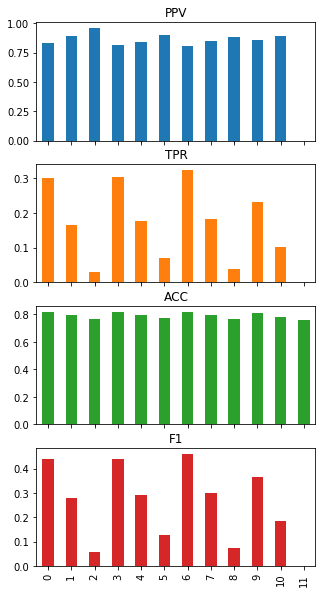

In [51]:
Models = [LGRModel, RFModel, CBSTModel, NNModel]
thresholds=[0.7, 0.8, 0.9]
ConfusionMatrixComparison = mltk.confusion_matrix_comparison(TestDataset, Models, thresholds, score_variable=None, show_plot=True)
ConfusionMatrixComparison.style.background_gradient(cmap='RdYlGn').set_precision(3)


#### Score (1-10) Threshold

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.3s finished


6513/6513 [==============================] - 0s 5us/sample


,ModelID,TN,FP,FN,TP,TOTAL,P1,P0,A1,A0,TPR,TNR,FPR,FNR,PPV,ACC,F1
0,INCOMELEVELLGR20190728184435_[TH=7],4856,96,1094,467,6513,563,5950,1561,4952,0.299,0.981,0.0194,0.701,0.829,0.817,0.44
1,INCOMELEVELLGR20190728184435_[TH=8],4921,31,1304,257,6513,288,6225,1561,4952,0.165,0.994,0.00626,0.835,0.892,0.795,0.278
2,INCOMELEVELLGR20190728184435_[TH=9],4950,2,1513,48,6513,50,6463,1561,4952,0.0307,1,0.000404,0.969,0.96,0.767,0.0596
3,INCOMELEVELRF20190728184436_[TH=7],4845,107,1090,471,6513,578,5935,1561,4952,0.302,0.978,0.0216,0.698,0.815,0.816,0.44
4,INCOMELEVELRF20190728184436_[TH=8],4899,53,1285,276,6513,329,6184,1561,4952,0.177,0.989,0.0107,0.823,0.839,0.795,0.292
5,INCOMELEVELRF20190728184436_[TH=9],4940,12,1453,108,6513,120,6393,1561,4952,0.0692,0.998,0.00242,0.931,0.9,0.775,0.128
6,INCOMELEVELCBST20190728184506_[TH=7],4831,121,1056,505,6513,626,5887,1561,4952,0.324,0.976,0.0244,0.676,0.807,0.819,0.462
7,INCOMELEVELCBST20190728184506_[TH=8],4901,51,1276,285,6513,336,6177,1561,4952,0.183,0.99,0.0103,0.817,0.848,0.796,0.3
8,INCOMELEVELCBST20190728184506_[TH=9],4944,8,1501,60,6513,68,6445,1561,4952,0.0384,0.998,0.00162,0.962,0.882,0.768,0.0737
9,INCOMELEVELNN20190728184442_[TH=7],4893,59,1200,361,6513,420,6093,1561,4952,0.231,0.988,0.0119,0.769,0.86,0.807,0.364


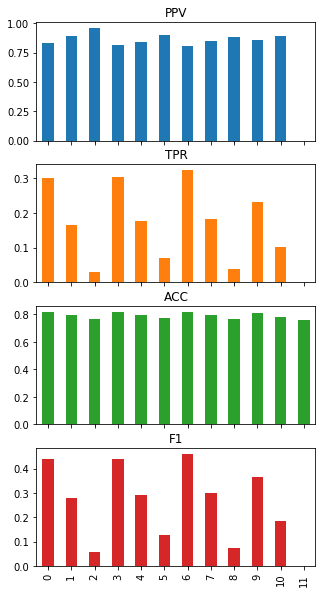

In [52]:
Models = [LGRModel, RFModel, CBSTModel, NNModel]
thresholds=[7, 8, 9]
ConfusionMatrixComparison = mltk.confusion_matrix_comparison(TestDataset, Models, thresholds, score_variable=score_label, show_plot=True)
ConfusionMatrixComparison.style.background_gradient(cmap='RdYlGn').set_precision(3)


### 7.4 Set Custom Score Edges

### Re-bin quantiles

ROC AUC 0.8908904729477293
PRC AUC 0.7204513440545235


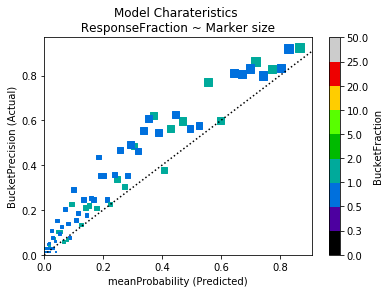

In [53]:
RobustnessTable, ROCCurve, PrecisionRecallCurve, roc_auc, prc_auc = mltk.model_performance_matrics(ResultsSet=TestDataset, target_variable=targetVariable, score_variable=score_variable, quantile_label='Quantile',  quantiles=100, show_plot=True)
print('ROC AUC', roc_auc)
print('PRC AUC', prc_auc)

In [54]:
RobustnessTable.style.background_gradient(cmap='RdYlGn').set_precision(3)

,minProbability,maxProbability,meanProbability,BucketCount,ResponseCount,BucketFraction,ResponseFraction,BucketPrecision,CumulativeBucketFraction,CumulativeResponseFraction,CumulativePrecision
Quantile,,,,,,,,,,,
1,9.85e-05,0.000278,0.000203,69,0,0.0106,0,0,1,1,0.24
2,0.000281,0.00041,0.000336,67,0,0.0103,0,0,0.989,1,0.242
3,0.000418,0.000519,0.000478,63,1,0.00967,0.000641,0.0159,0.979,1,0.245
4,0.00052,0.000649,0.000597,62,0,0.00952,0,0,0.969,0.999,0.247
5,0.000653,0.000778,0.000704,65,0,0.00998,0,0,0.96,0.999,0.25
6,0.00078,0.000944,0.00087,67,1,0.0103,0.000641,0.0149,0.95,0.999,0.252
7,0.000944,0.00105,0.001,77,0,0.0118,0,0,0.94,0.999,0.255
8,0.00106,0.00119,0.00113,51,0,0.00783,0,0,0.928,0.999,0.258
9,0.00119,0.00133,0.00128,68,0,0.0104,0,0,0.92,0.999,0.26


In [55]:
edges = [0.0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.75, 0.95, 1.0]
LGRModel.set_score_edges(edges)

### 7.5 Save Models

In [56]:
saveFilePath = '{}.pkl'.format(LGRModel.get_model_id())
mltk.save_model(LGRModel, saveFilePath)

Saving model to file INCOMELEVELLGR20190728184435.pkl


## 8. Generate Predicted Value (Score) <a class="anchor" id="deploy"></a>
[^](#toc) 

### 8.1 Define ETL Function

In [57]:
def ETL(DataFrame):
    # Add ID column
    DataFrame = mltk.add_identity_column(DataFrame, id_label='ID', start=1, increment=1)
    
    # Clean column names
    DataFrame = mltk.clean_column_names(DataFrame, replace='')
    input_columns = list(DataFrame.columns)

    variables_setup_dict = """   
    {
        "setting":"model",

        "variables": {            
                "category_variables" : ["sex", "nativecountry", "race", "occupation", "workclass", "maritalstatus", "relationship"],
                "binary_variables": [],
                "target_variable":"HighIncome"
        },


        "transforms": {
            "type":"transforms",
            "variable_class": "num",
            "include":false,
            "show_output":false,
            "rule_set": [
                {
                    "variable":"age", 
                    "to": "normalizedage", 
                    "operation":"normalize", 
                    "parameters":{"method":"zscore"}
                },
                {
                    "variable":"hoursperweek", 
                    "to": "normalizedhoursperweek", 
                    "operation":"normalize", 
                    "parameters":{"method":"minmaxfs"}
                }
            ]
        },

        "conditions":{
            "type":"conditions",
            "variable_class": "bin",
            "include":true,
            "show_output":false,
            "rule_set":[        
                {
                    "bin_variable":"CapitalGainPositive", 
                    "str_condition":"capitalgain>0"
                },

                {
                    "bin_variable":"CapitalLossPositive", 
                    "str_condition":"capitalloss>0"
                }
            ]
        },

        "buckets":{
            "type":"buckets",
            "variable_class": "cat",
            "include":true,
            "show_output":false,
            "rule_set":[
                {
                    "variable":"age", 
                    "category_variable":null, 
                    "str_labels":["0", "20", "30", "40", "50", "60", "INF"],
                    "right_inclusive":true
                },
                {
                    "variable":"educationnum", 
                    "category_variable":null, 
                    "str_labels":["1", "4", "6", "8", "10", "13", "16"],
                    "right_inclusive":true
                },
                {
                    "variable":"hoursperweek", 
                    "category_variable":null, 
                    "str_labels":["0", "20", "40", "50", "60", "80", "INF"],
                    "right_inclusive":true
                }
            ]
        },

        "category_merges":{
            "type":"category_merges",
            "variable_class": "cat",
            "include":true,
            "show_output":false,
            "rule_set":[
                {
                    "variable":"maritalstatus", 
                    "category_variable":"maritalstatus", 
                    "group_value":"Married", 
                    "values":["Married-civ-spouse", "Married-spouse-absent", "Married-AF-spouse"]
                }
            ]
        },

        "pair_equality": {
            "type":"pair_equality",
            "variable_class": "cat",
            "include":false,
            "show_output":false,
            "rule_set":[
                {
                    "variable1":"age", 
                    "variable2":"hoursperweek",
                    "category_variable":"TestGroup"
                }
            ]
        }
    }
    """    
    
    DataFrame, categoryVariables, binaryVariables, targetVariable = mltk.setup_variables_task(DataFrame, variables_setup_dict)
    
    # Create One Hot Encoded Variables
    DataFrame, featureVariables, targetVariable = mltk.to_one_hot_encode(DataFrame, category_variables=categoryVariables, binary_variables=binaryVariables, target_variable=targetVariable)

    return DataFrame, input_columns

### 8.2 Load Model Object and Input Data

In [58]:
MLModelObject = mltk.load_model(saveFilePath)

TestInput = """
{
      "ID": "A001",
      "age": 32,
      "workclass": "Private",
      "education": "Doctorate",
      "education-num": 16,
      "marital-status": "Married-civ-spouse",
      "occupation": "Prof-specialty",
      "relationship": "Husband",
      "race": "Asian-Pac-Islander",
      "sex": "Male",
      "capital-gain": 0,
      "capital-loss": 0,
      "hours-per-week": 40,
      "native-country": "?"
}
"""

Loading model from file INCOMELEVELLGR20190728184435.pkl


### 8.3 Generate Scores

In [59]:
output = mltk.score_records(TestInput, MLModelObject, edges=None, ETL=ETL, return_type='dict') # Other options for return_type, {'json', 'frame'}
output[0]

Column ID exists in the DataFrame


{'ID': 'A001',
 'age': 32,
 'capitalgain': 0,
 'capitalloss': 0,
 'education': 'Doctorate',
 'educationnum': 16,
 'hoursperweek': 40,
 'maritalstatus': 'Married',
 'nativecountry': '?',
 'occupation': 'Prof-specialty',
 'race': 'Asian-Pac-Islander',
 'relationship': 'Husband',
 'sex': 'Male',
 'workclass': 'Private',
 'Probability': 0.7494862543903595,
 'Score': 8}

<hr>
This notebook and related materials were developed by Sumudu Tennakoon to demostrate the MLToolkit python library and its interoperability with the standared Python data analysis and machine learning packages (e.g. Pandas, Sci-kitlearn, Statsmodel, TensorFlow, Catboost, etc.)
Create Date: July 01, 2018; Last Update: July 28, 2019. 
Apache License, Version 2.0 (http://www.apache.org/licenses/LICENSE-2.0)